# Udacity Machine Learning Nanodegree
--------------


## Capstone Project on Vehicle-Detection
---------------


### Feature Extraction Steps

#### Imports

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import time 
#import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import pickle
%matplotlib inline

--------

### Feature Extraction

In [3]:
from project.feature_extraction import FeatureExtraction

#### Data

In [4]:
# Read in our vehicles and non-vehicles
cars = glob.glob('data/vehicles/**/*.png')
notcars = glob.glob('data/non-vehicles/**/*.png')

#### Application of some feature extraction techniques

In [5]:
colorspace = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
hist_bins = 32
hist_bins_range = (0,256)
spatial_size = (32,32)

FE = FeatureExtraction(hist_bins = hist_bins,\
                            hist_bins_range =  hist_bins_range,\
                            spatial_size = spatial_size,\
                            orient = orient,\
                            pix_per_cell =  pix_per_cell,\
                            cell_per_block =  cell_per_block)


#### Exploration of different chanals for hist feature vecture

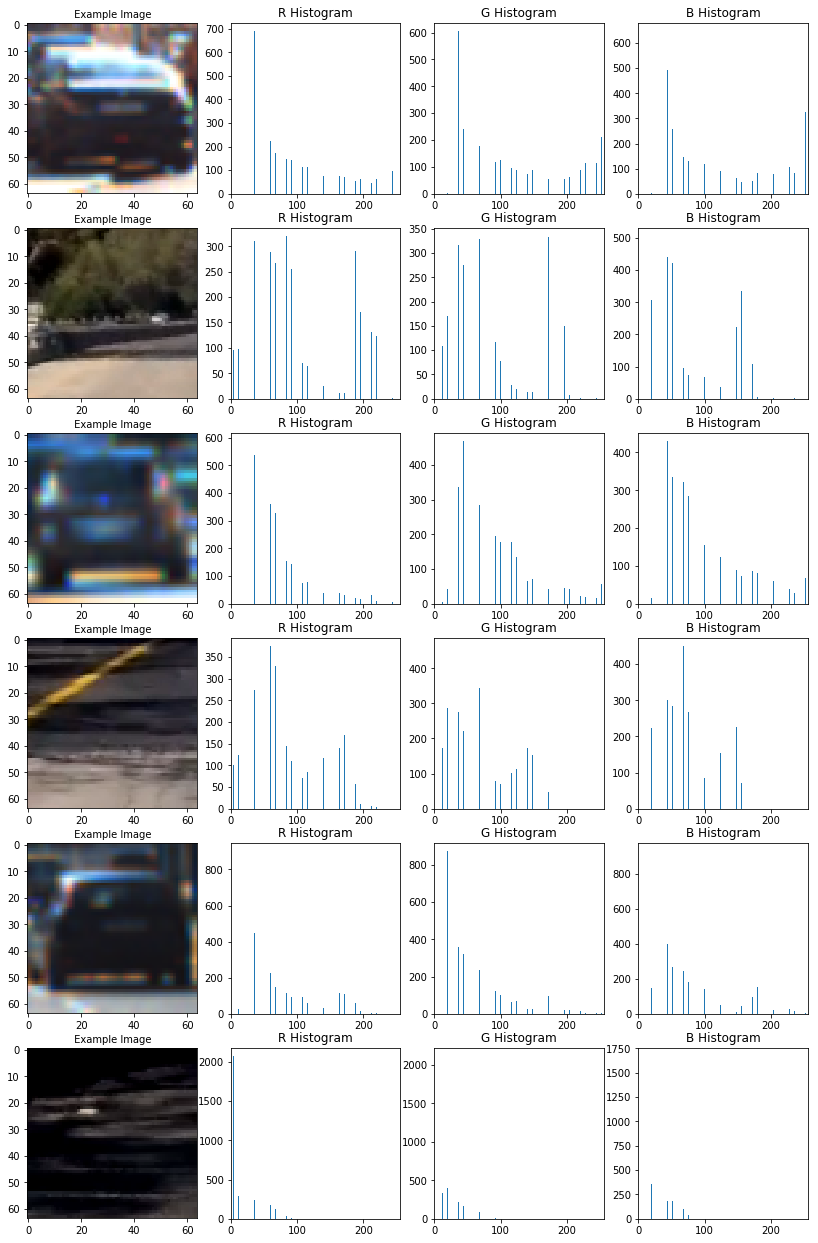

In [6]:
fig = plt.figure(figsize=(14,22))

count = 1
n1,n2 = 6,4
for k in range(6):
    
    if k%2 ==0:
        ind = np.random.randint(0, len(cars))
        Img = cv2.imread(cars[ind])
        
    else:
        ind = np.random.randint(0, len(notcars))
        Img = cv2.imread(notcars[ind])
    
    
    Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
    
    ch1_hist,ch2_hist,ch3_hist, bincen, hist_features\
         = FE.color_hist(Img,plot_info=True)
    
    
    #fig-1
    fig.add_subplot(n1,n2,count)
    plt.imshow(Img)
    plt.title(' Example Image', fontsize=10)
    count += 1
    
    #fig-2
    fig.add_subplot(n1,n2,count)
    plt.bar(bincen,ch1_hist[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    count += 1
    
    #fig-3
    fig.add_subplot(n1,n2,count)
    plt.bar(bincen,ch2_hist[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    count += 1
    
    #fig-4
    fig.add_subplot(n1,n2,count)
    plt.bar(bincen,ch3_hist[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    count += 1  
      

-------

#### Exploring bin_spatial feature vectors

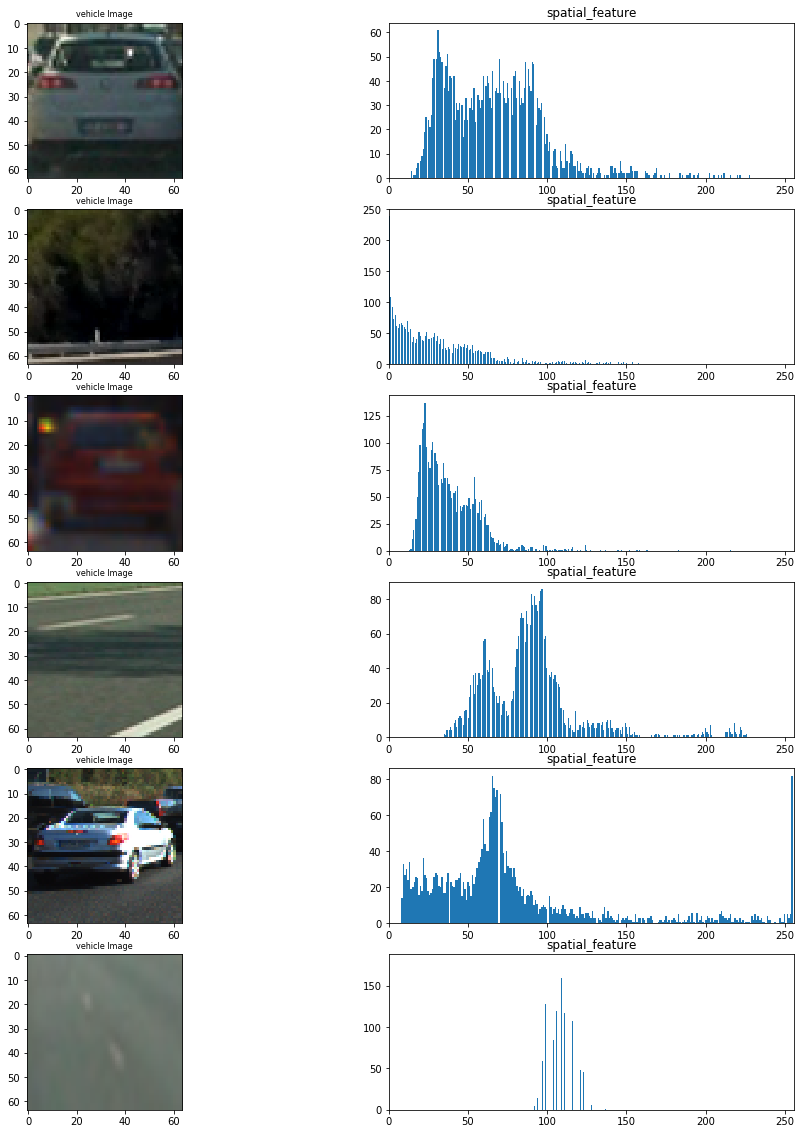

In [7]:
fig = plt.figure(figsize=(16,20))

count = 1
n1,n2 = 6,2
for k in range(6):
    
    if k%2 ==0:
        ind = np.random.randint(0, len(cars))
        Img = cv2.imread(cars[ind])
        
    else:
        ind = np.random.randint(0, len(notcars))
        Img = cv2.imread(notcars[ind])
    
    
    Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
    
    features = FE.bin_spatial(Img)
    
    
    #fig-1
    fig.add_subplot(n1,n2,count)
    plt.imshow(Img)
    plt.title('vehicle Image', fontsize=8)
    count += 1
    
    
    #fig-5
    fig.add_subplot(6,2,count)
    plt.hist(features,bins=255)
    plt.xlim(0, 256)
    plt.title('spatial_feature')
    count += 1 

------

#### Exploration of color spaces

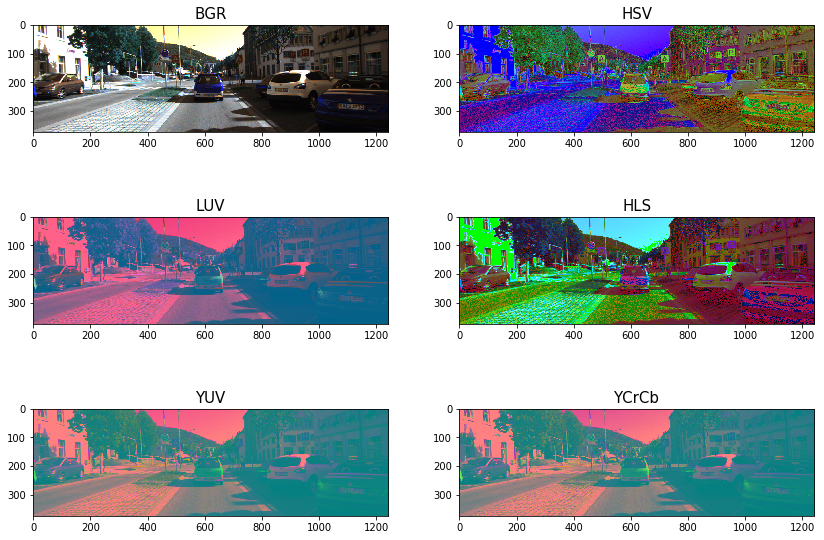

In [8]:
Img = cv2.imread("000275.png")
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)

count = 1
n1,n2 = 3,2
convs = ['BGR','HSV','LUV','HLS','YUV','YCrCb']

fig = plt.figure(figsize=(14,10))  

for  conv in convs: 
    Img2 = FE.convert_color(Img, conv)
    
    #fig-1
    fig.add_subplot(n1,n2,count)
    plt.imshow(Img2)
    plt.title(conv, fontsize=15)
    count += 1    

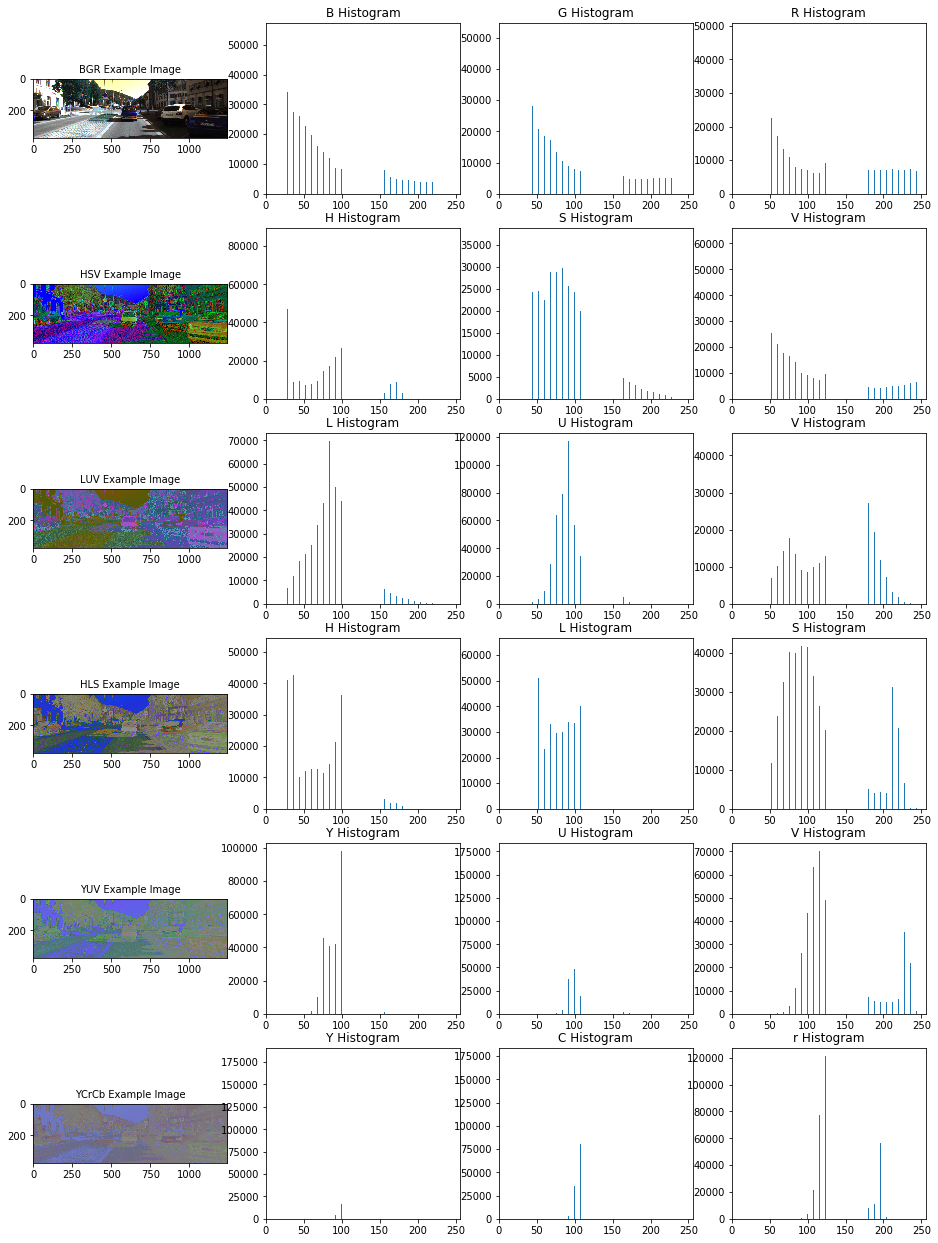

In [9]:
Img = cv2.imread("000275.png")
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)

count = 1
n1,n2 = 6,4
convs = ['BGR','HSV','LUV','HLS','YUV','YCrCb']

fig = plt.figure(figsize=(16,22))  

for  conv in convs: 
    Img = FE.convert_color(Img, conv)
    
    ch1_hist,ch2_hist,ch3_hist, bincen, hist_features\
         = FE.color_hist(Img,plot_info=True)
    
    #fig-1
    fig.add_subplot(n1,n2,count)
    plt.imshow(Img)
    plt.title(conv+' Example Image', fontsize=10)
    count += 1
    
    #fig-2
    fig.add_subplot(n1,n2,count)
    plt.bar(bincen,ch1_hist[0])
    plt.xlim(0, 256)
    plt.title(conv[0]+' Histogram')
    count += 1
    
    #fig-3
    fig.add_subplot(n1,n2,count)
    plt.bar(bincen,ch2_hist[0])
    plt.xlim(0, 256)
    plt.title(conv[1]+' Histogram')
    count += 1
    
    #fig-4
    fig.add_subplot(n1,n2,count)
    plt.bar(bincen,ch3_hist[0])
    plt.xlim(0, 256)
    plt.title(conv[2]+' Histogram')
    count += 1  
      

---------

### 3-D plot of color space

#### Exploring 3D color space

In [10]:
from project.utils import plot3d

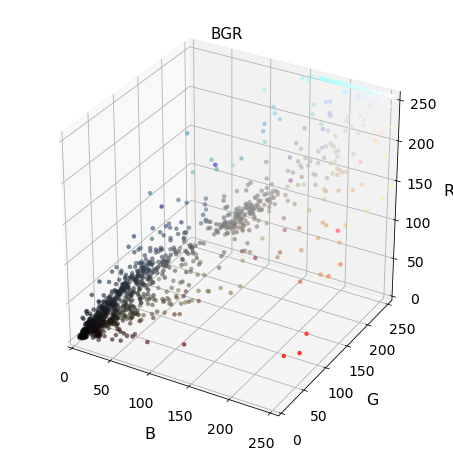

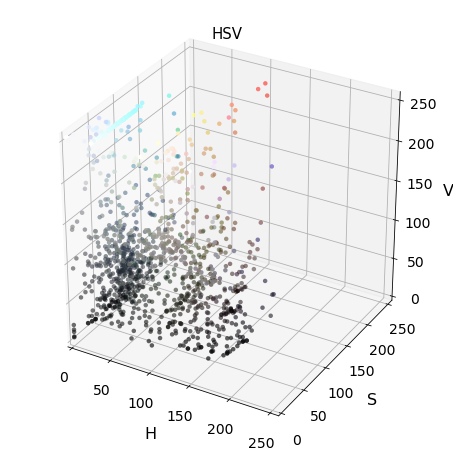

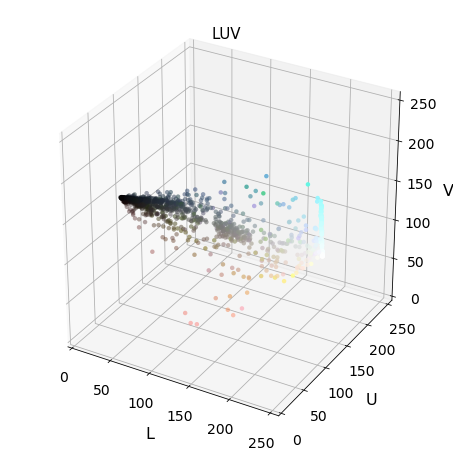

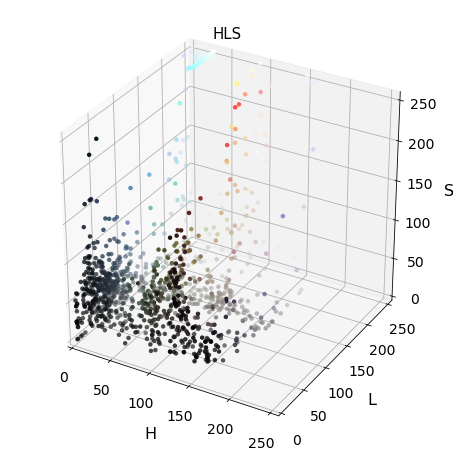

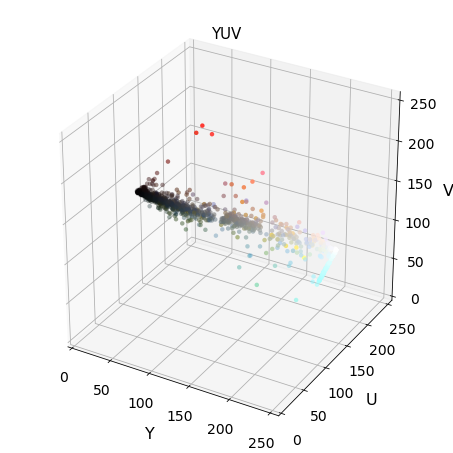

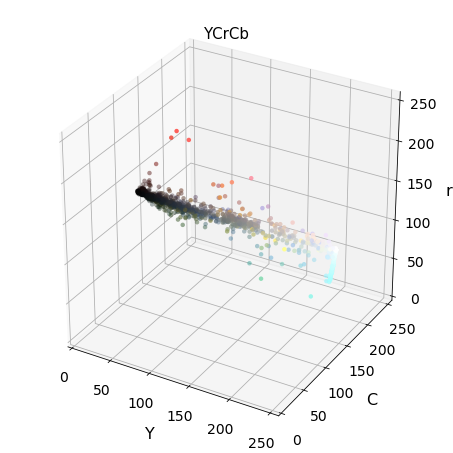

In [11]:
Img = cv2.imread("000275.png")
scale = max(Img.shape[0], Img.shape[1], 64) / 64  # at most 64 rows and columns
Img = cv2.resize(Img, (np.int(Img.shape[1] / scale),\
                             np.int(Img.shape[0] / scale)),\
                             interpolation=cv2.INTER_NEAREST)
    
Img_RGB = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
img_small_rgb = Img_RGB / 255.

convs = ['BGR','HSV','LUV','HLS','YUV','YCrCb']
 
for  conv in convs:
    
    Img2 = FE.convert_color(Img, conv)
    
    #fig-1
    plot3d(Img2, img_small_rgb,axis_labels=list(conv))
    plt.title(conv, fontsize=15)
    plt.show()
    

------

#### Hog feature visualizations

In [14]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

/Users/dibakarsigdel/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


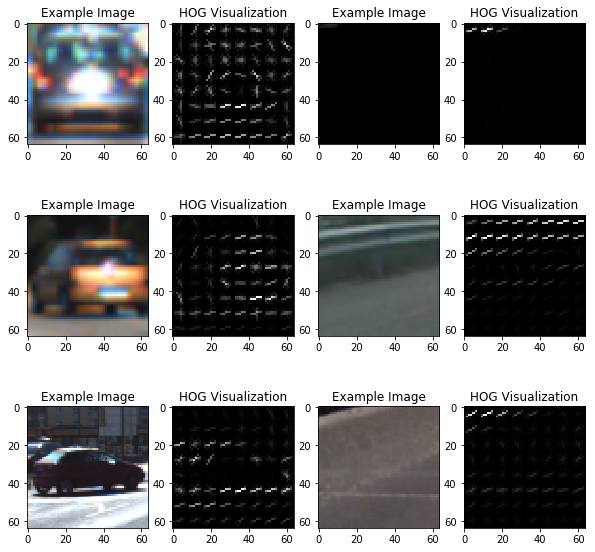

In [15]:
fig = plt.figure(figsize=(10,10))

count = 1
for k in range (6):
    
    # Generate a random index to look at a car image
    if k%2 ==0:
        ind = np.random.randint(0, len(cars))
        Img = mpimg.imread(cars[ind])
    else:
        
        ind = np.random.randint(0, len(notcars))
        Img = mpimg.imread(notcars[ind])
        
    gray = cv2.cvtColor(Img, cv2.COLOR_RGB2GRAY)
    
    features, hog_image = FE.get_hog_features(gray,vis=True, feature_vec=True)
    
    
    #fig-1
    fig.add_subplot(3,4,count)
    plt.imshow(Img)
    plt.title('Example Image')
    count += 1

    
    #fig-1
    fig.add_subplot(3,4,count)
    plt.imshow(hog_image,cmap='gray')
    plt.title('HOG Visualization')
    count += 1
    
   

--------

### Application of feature Normalization

In [16]:
X_car = FE.extract_color_features(cars[0:100],cspace=colorspace)
X_notcar = FE.extract_color_features(notcars[0:100], cspace=colorspace)
X = np.vstack((X_car,X_notcar)).astype(np.float64) 
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

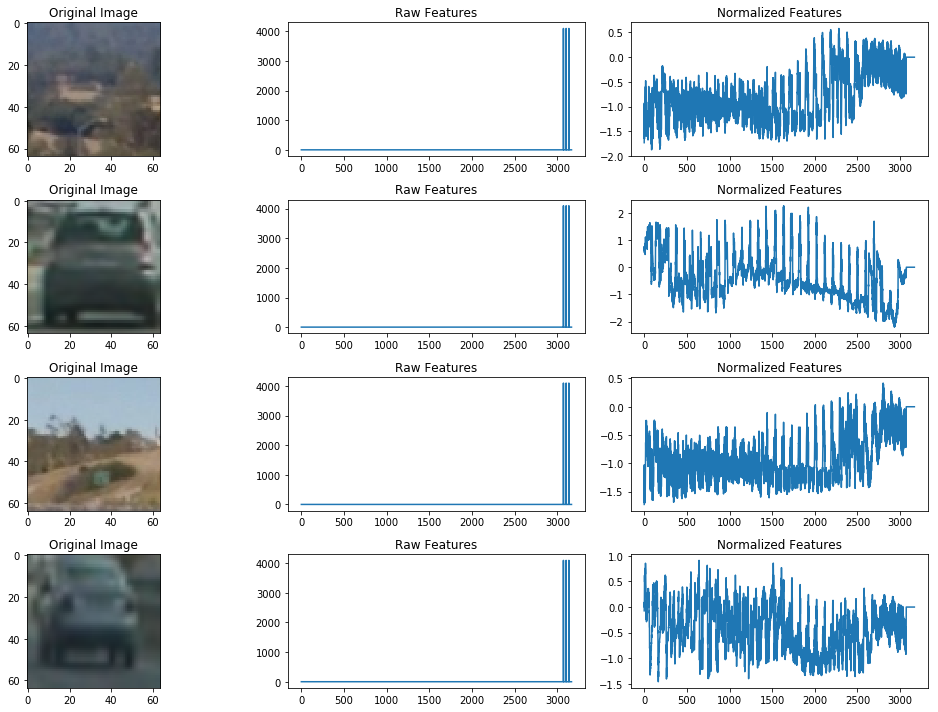

In [18]:
fig = plt.figure(figsize=(14,10))
count = 1
for k in range (1,5):
    # Generate a random index to look at a car image
    if k%2 ==0:
        ind = np.random.randint(0,100)
        Img = mpimg.imread(cars[ind])
        
    else:
        ind = np.random.randint(0,100)
        Img = mpimg.imread(notcars[ind])
        
    plt.subplot(4,3,count)
    plt.imshow(Img)
    plt.title('Original Image')
    count += 1
        
    plt.subplot(4,3,count)
    plt.plot(X[ind])
    plt.title('Raw Features')
    count += 1
        
    plt.subplot(4,3,count)
    plt.plot(scaled_X[ind])
    plt.title('Normalized Features')
    count += 1
        
    fig.tight_layout()

-------